<a href="https://colab.research.google.com/github/BhagyaSri-1806/DataAnalyst/blob/main/Universities%26ToyotaCorolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
universities = pd.read_csv('/content/Universities.csv')
universities.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


# **1. Clustering:**

#**a. Remove all records with missing measurements**

In [3]:
# Drop rows with missing values
universities_complete = universities.dropna()

print(f"Data shape after removing missing values: {universities_complete.shape}")


Data shape after removing missing values: (471, 20)


# **b. Normalize continuous measurements and perform hierarchical clustering**

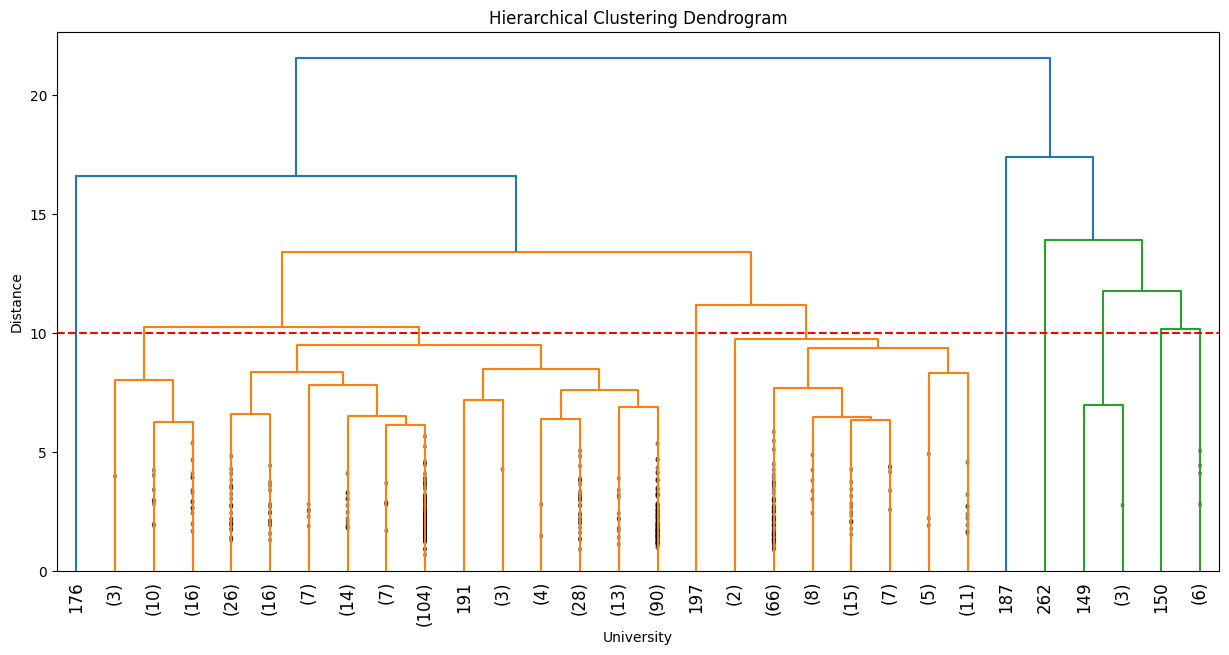

In [4]:
# Assuming the continuous columns are all numeric
# Identify continuous columns (numerical types)
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler # This line was added to import the StandardScaler class
continuous_cols = universities_complete.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove categorical columns if present in numeric types
categorical_cols = ['State', 'Private/Public']  # Given in problem
continuous_cols = [col for col in continuous_cols if col not in categorical_cols]

# Normalize continuous data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(universities_complete[continuous_cols]) # Replace df_complete to universities_complete

# Hierarchical clustering with complete linkage and Euclidean distance
#Import linkage and dendrogram functions
from scipy.cluster.hierarchy import linkage, dendrogram # This line was added to import linkage and dendrogram

linked = linkage(X_scaled, method='complete', metric='euclidean')

# Plot dendrogram
#Import pyplot
import matplotlib.pyplot as plt # this line was added to import the pyplot module
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('University')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--')  # threshold to choose clusters visually
plt.show()

#**c. Compare summary statistics for each cluster and describe them**

<ipython-input-5-0a42d6646f23>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  universities_complete['Cluster'] = fcluster(linked, t=threshold, criterion='distance')


Cluster-wise Feature Averages:


,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
Cluster,,,,,,,,,,,,,,,,,,
1,1.034483,8232.758621,6075.689655,2520.724138,24.862069,54.137931,13282.344828,3320.586207,2828.379310,7927.241379,2159.344828,1995.758621,468.931034,594.172414,2054.068966,84.689655,16.096552,56.482759
2,1.728435,1722.204473,1243.038339,499.910543,20.405751,47.642173,2206.041534,560.239617,7933.600639,8964.811502,1956.686901,1952.287540,345.495208,522.760383,1317.111821,66.881789,14.807668,60.897764
3,1.947368,4180.938596,2204.526316,721.833333,48.982456,76.710526,2888.798246,352.464912,15384.359649,15670.552632,2920.105263,2578.991228,415.447368,586.684211,996.543860,86.745614,11.014035,80.929825
4,2.000000,3294.000000,2855.000000,956.000000,44.000000,67.000000,4576.000000,1140.000000,11690.000000,11690.000000,2300.000000,2430.000000,80.000000,800.000000,6800.000000,84.000000,4.600000,67.000000
5,2.000000,601.000000,396.000000,203.000000,1.000000,20.000000,525.000000,323.000000,11230.000000,11230.000000,3843.000000,2800.000000,130.000000,2340.000000,620.000000,8.000000,6.800000,47.000000
6,2.000000,13699.750000,9314.250000,2811.500000,33.500000,65.000000,12383.000000,3720.000000,16045.000000,16045.000000,3774.000000,3122.750000,286.500000,577.500000,1486.250000,79.000000,11.875000,63.250000
7,1.000000,15945.500000,11570.166667,5264.166667,41.500000,77.500000,27387.333333,3322.833333,2556.166667,7759.500000,1826.166667,2058.000000,566.500000,564.333333,2135.000000,88.000000,18.650000,66.333333
8,1.000000,14438.000000,12414.000000,3816.000000,12.000000,39.000000,16282.000000,1940.000000,2220.000000,8566.000000,1712.000000,2185.000000,3247.000000,500.000000,1400.000000,88.000000,16.700000,68.000000
9,1.000000,48094.000000,26330.000000,4520.000000,36.000000,79.000000,21401.000000,3712.000000,3640.000000,7410.000000,2780.000000,1986.000000,1003.000000,690.000000,2009.000000,90.000000,19.500000,77.000000


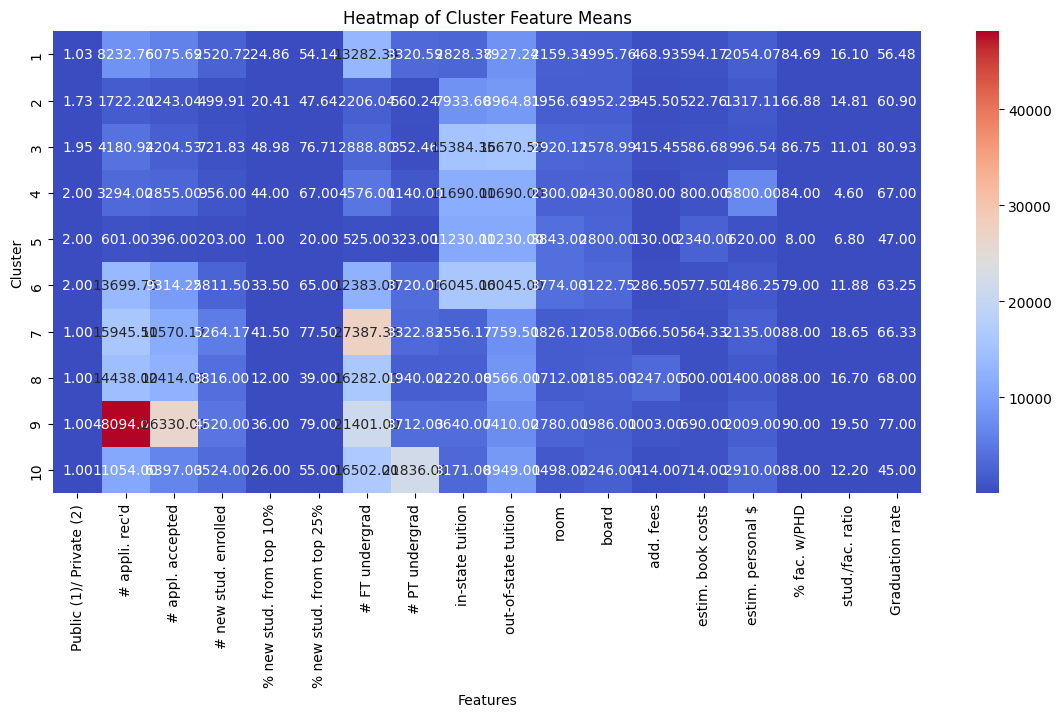

In [5]:
# First: basic imports again (if not done)
import seaborn as sns
import matplotlib.pyplot as plt
#Import fcluster
from scipy.cluster.hierarchy import fcluster # this line was added to import fcluster
# Assuming the continuous columns are all numeric
# Identify continuous columns (numerical types)
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler # This line was added to import the StandardScaler class
continuous_cols = universities_complete.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove categorical columns if present in numeric types
categorical_cols = ['State', 'Private/Public']  # Given in problem
continuous_cols = [col for col in continuous_cols if col not in categorical_cols]


# Perform the hierarchical clustering and add cluster labels to the DataFrame
# Normalize continuous data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(universities_complete[continuous_cols]) # Replace df_complete to universities_complete

# Hierarchical clustering with complete linkage and Euclidean distance
#Import linkage and dendrogram functions
from scipy.cluster.hierarchy import linkage, dendrogram # This line was added to import linkage and dendrogram

linked = linkage(X_scaled, method='complete', metric='euclidean')
# Set a cutoff for cluster assignment (e.g., 10, as visually determined from the dendrogram)
# Adjust this threshold based on your desired number of clusters
threshold = 10
universities_complete['Cluster'] = fcluster(linked, t=threshold, criterion='distance')

# Calculate the mean of each feature per cluster
cluster_summary = universities_complete.groupby('Cluster')[continuous_cols].mean()

# Display as a nice styled table
print("Cluster-wise Feature Averages:")
display(cluster_summary.style.background_gradient(cmap='Blues'))

# Heatmap to visualize how features vary across clusters
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Cluster Feature Means')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

# **# d. Analyze Categorical variables vs Clusters (State, Private/Public)**

In [6]:
# Private/Public vs Cluster
private_cluster = pd.crosstab(universities_complete['Cluster'], universities_complete['Public (1)/ Private (2)'], normalize='index')
print("Private/Public Distribution by Cluster:\n", private_cluster)

# State vs Cluster
state_cluster = pd.crosstab(universities_complete['Cluster'], universities_complete['State'], normalize='index')
print("State Distribution by Cluster (first few states):\n", state_cluster.iloc[:, :5])


Private/Public Distribution by Cluster:
 Public (1)/ Private (2)         1         2
Cluster                                    
1                        0.965517  0.034483
2                        0.271565  0.728435
3                        0.052632  0.947368
4                        0.000000  1.000000
5                        0.000000  1.000000
6                        0.000000  1.000000
7                        1.000000  0.000000
8                        1.000000  0.000000
9                        1.000000  0.000000
10                       1.000000  0.000000
State Distribution by Cluster (first few states):
 State         AK        AL       AR        AZ        CA
Cluster                                                
1        0.00000  0.034483  0.00000  0.034483  0.034483
2        0.00639  0.006390  0.01278  0.000000  0.009585
3        0.00000  0.008772  0.00000  0.000000  0.087719
4        0.00000  0.000000  0.00000  0.000000  0.000000
5        0.00000  0.000000  0.00000  0.00000

In [7]:
# Cross-tabulation with Private/Public
# Changed universities_clean to universities_complete
if 'Public (1)/ Private (2)' in universities_complete.columns:
    print(pd.crosstab(universities_complete['Cluster'], universities_complete['Public (1)/ Private (2)']))

# Cross-tabulation with State
# Changed universities_clean to universities_complete
if 'State' in universities_complete.columns:
    print(pd.crosstab(universities_complete['Cluster'], universities_complete['State']))

Public (1)/ Private (2)   1    2
Cluster                         
1                        28    1
2                        85  228
3                         6  108
4                         0    1
5                         0    1
6                         0    4
7                         6    0
8                         1    0
9                         1    0
10                        1    0
State    AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Cluster                                          ...                           
1         0   1   0   1   1   0   1   0   1   1  ...   0   1   1   1   1   1   
2         2   2   4   0   3   5   3   1   1   4  ...   4  11  15   1  10   6   
3         0   1   0   0  10   1   6   3   0   3  ...   0   3   2   0   4   0   
4         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
5         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
6         0   0   0   0   1   0   0   0   0 

# **e. External information that can explain clusters**

When we cluster universities based on their numerical features (like tuitio\

graduation rate, enrollment),
external real-world factors often explain why similar universities fall into the same cluster.


Here are the key external factors:


# 1. University Rankings

Universities with high tuition, low acceptance rates, and high graduation rates often belong to top-ranked institutions.


Elite universities (like Harvard, MIT, Stanford) attract the best students and demand high fees.


Thus, clustering based on numerical features indirectly captures the influence of university rankings.


Example:
Cluster 1 might consist of Ivy League schools and top private universities, which are consistently ranked in the top 50 nationally.

# 2. State vs Private Funding

Public universities (funded by state governments) usually have:

Lower tuition, especially for in-state students.

Larger undergraduate populations.

Private universities rely more on tuition fees and endowments, leading to:

Higher tuition.

Smaller, often more selective student bodies.

Example:
Cluster 2 could mostly consist of public universities like the University of California system, with lower tuition but large enrollments.


# 3. Enrollment Size and Specialization (Technical vs Liberal Arts)

Some universities specialize in technical disciplines (engineering, sciences) or liberal arts.

Specialized schools may have smaller enrollments but higher costs due to specialized facilities and faculty.

Larger public universities typically offer a wider range of programs and degrees, affecting their tuition and graduation rates.

Example:
Technical schools (e.g., MIT, Caltech) might cluster separately from liberal arts colleges (e.g., Amherst College, Williams College).

# 4. Cost of Living in the Area (City Size and Expenses)

Universities located in major cities (e.g., New York, Boston, San Francisco) generally have:

Higher tuition (to match operating costs).

Higher additional fees (room, board, personal expenses).

Universities in rural or less expensive regions often have lower total costs.

Example:
Urban universities like NYU or Boston University would cluster together with higher total estimated costs.

# 5. Reputation and Selectivity (Acceptance Rates)

More prestigious universities are harder to get into (lower acceptance rates).

They tend to:

Enroll students from top percentiles (top 10% or 25% of their high school class).

Have higher graduation rates due to stronger academic preparation of students.

Reputation drives both demand and cost, influencing tuition and selectivity patterns.

Example:
Cluster 1 (elite schools) would show low acceptance rates and high percentages of students from the top of their class.

# f. Impute missing values for Tufts University

In [8]:
# Locate Tufts University
tufts = universities[universities['College Name'] == 'Tufts University']

# Drop NA columns for Tufts
tufts_values = tufts[continuous_cols].dropna(axis=1)

# Find cluster means
# Changed universities_clean to universities_complete
cluster_means = universities_complete.groupby('Cluster')[continuous_cols].mean()

# Calculate Euclidean distance
import numpy as np
distances = []

for cluster in cluster_means.index:
    common_cols = tufts_values.columns
    cluster_point = cluster_means.loc[cluster, common_cols]
    tufts_point = tufts_values.iloc[0]
    distance = np.linalg.norm(cluster_point - tufts_point)
    distances.append((cluster, distance))

# Closest cluster
closest_cluster = min(distances, key=lambda x: x[1])[0]
print(f"Tufts University is closest to Cluster {closest_cluster}")

# Impute missing values
imputed_values = cluster_means.loc[closest_cluster]
print(imputed_values)

Tufts University is closest to Cluster 3
Public (1)/ Private (2)         1.947368
# appli. rec'd               4180.938596
# appl. accepted             2204.526316
# new stud. enrolled          721.833333
% new stud. from top 10%       48.982456
% new stud. from top 25%       76.710526
# FT undergrad               2888.798246
# PT undergrad                352.464912
in-state tuition            15384.359649
out-of-state tuition        15670.552632
room                         2920.105263
board                        2578.991228
add. fees                     415.447368
estim. book costs             586.684211
estim. personal $             996.543860
% fac. w/PHD                   86.745614
stud./fac. ratio               11.014035
Graduation rate                80.929825
Name: 3, dtype: float64


# **2. Principal Component Analysis:**

# **a. Identify the categorical variables.**

# Load Dataset

In [9]:
import pandas as pd

# Load the dataset
toyota = pd.read_csv('/content/ToyotaCorolla.csv')


toyota.head()


,Id,Model,Price,Age (month),Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


# a. Identify Categorical Variables

In [10]:
# Identify object (categorical) and boolean columns
categorical_vars = toyota.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical variables:", categorical_vars)


Categorical variables: ['Model', 'Fuel_Type', 'Color']



# b. Relationship between a categorical variable and binary dummy variables





**Categorical Variable:-**

A categorical variable is a variable that takes on a limited number of discrete values, typically representing groups or categories.

For example:

Fuel_Type could have values: Petrol, Diesel, CNG.

Color could be: Red, Blue, Black, etc.

These values are non-numeric and non-ordinal (i.e., they don’t have an inherent order).

 **Dummy Variables:-**

Dummy variables are binary (0 or 1) variables created to represent the categories of a categorical variable. They indicate the presence (1) or absence (0) of a particular category for each observation.



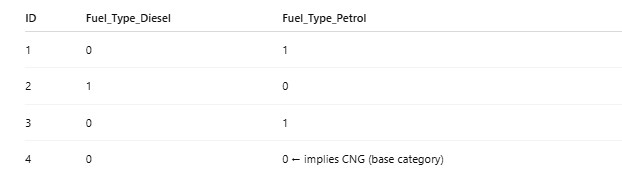

This has 3 categories: Petrol, Diesel, CNG.

Using dummy encoding, we create N - 1 = 2 dummy variables:

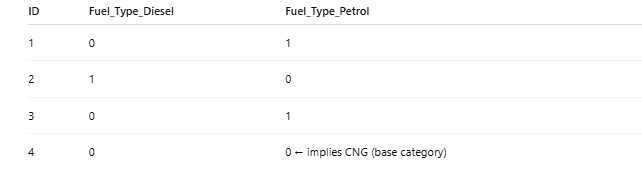



# c. Number of Dummy Variables

In [11]:
# Example for Fuel_Type
print("Unique values in Fuel_Type:", toyota['Fuel_Type'].nunique())


Unique values in Fuel_Type: 3


# d. Convert Categorical Variables into Dummy Variables

In [12]:
# Create dummy variables for all categorical features
toyota_dummies = pd.get_dummies(toyota, columns=categorical_vars, drop_first=True)

# Show the transformed version of the first row
print(toyota_dummies.iloc[0])


Id                  1
Price           13500
Age (month)        23
Mfg_Month          10
Mfg_Year         2002
                ...  
Color_Red       False
Color_Silver    False
Color_Violet    False
Color_White     False
Color_Yellow    False
Name: 0, Length: 365, dtype: object


# e. Correlation Matrix and Matrix Plot

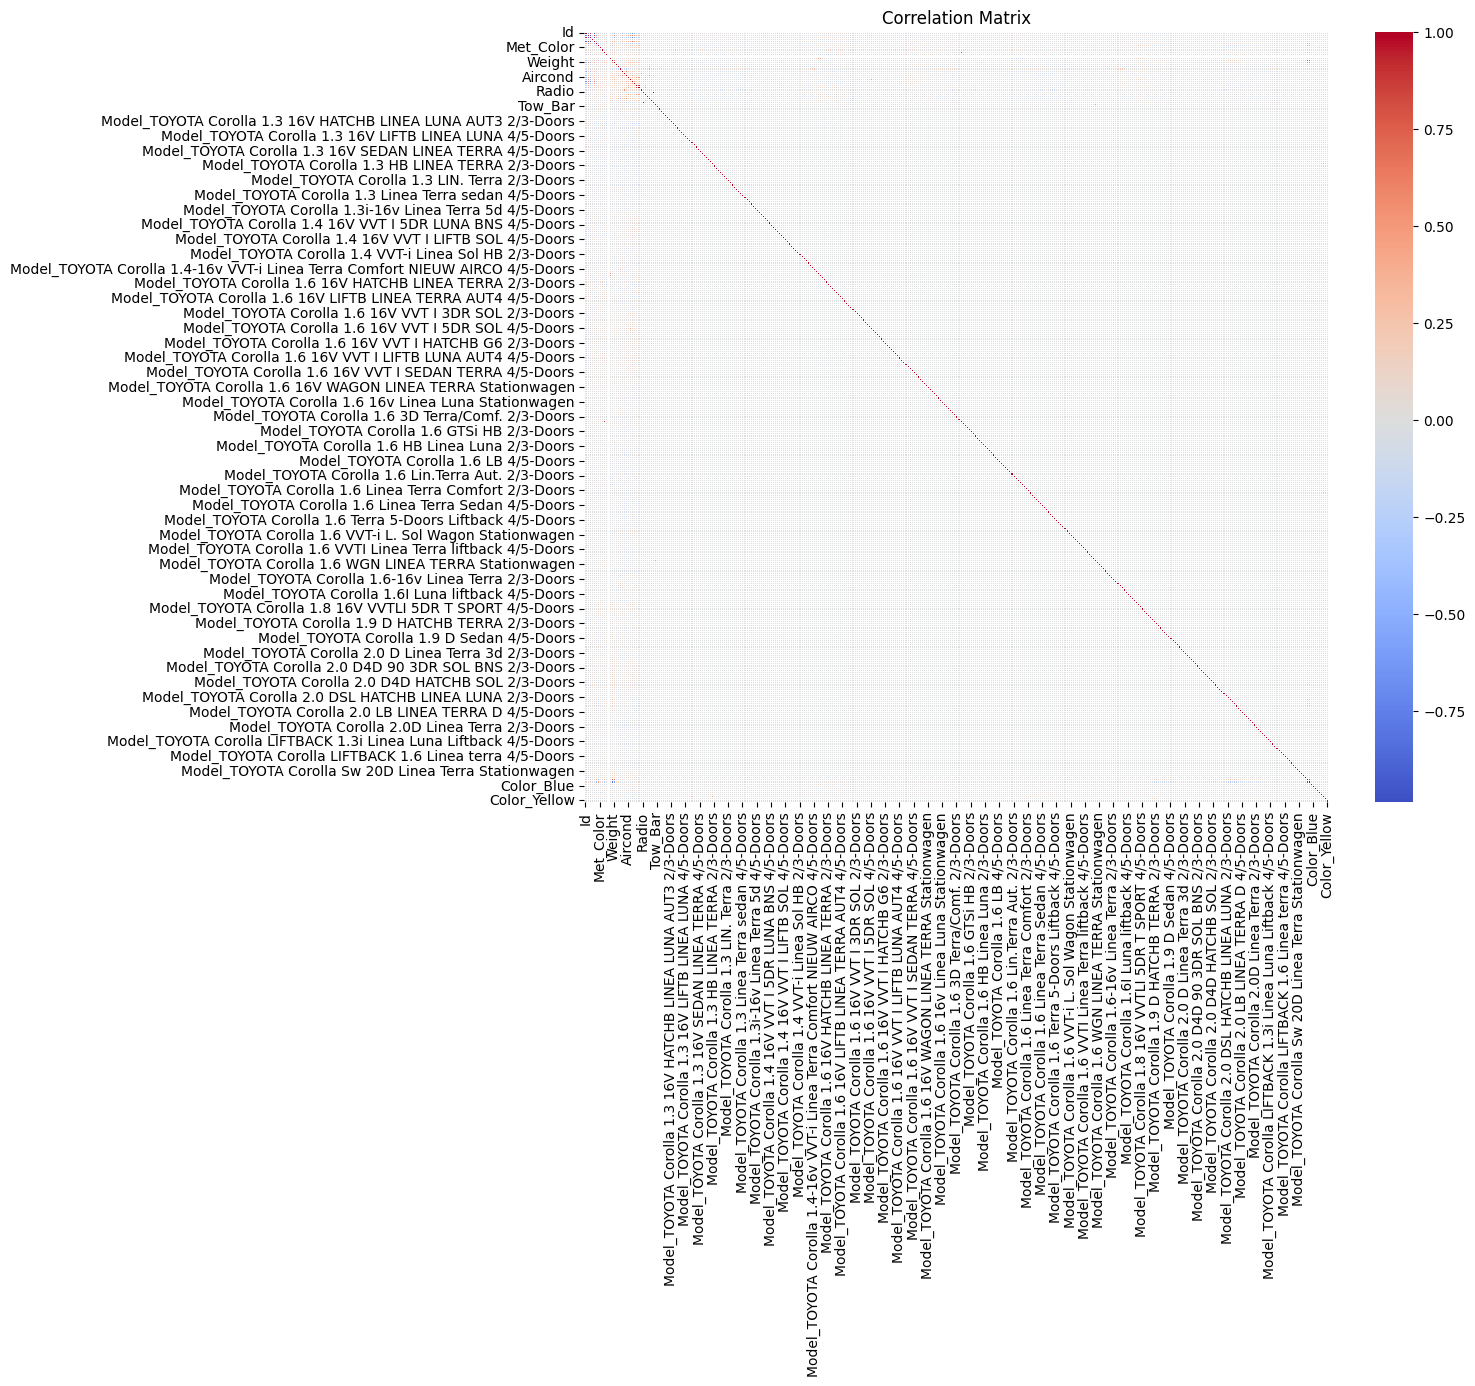

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric data only
cor_matrix = toyota_dummies.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 3. Testing  concepts:

In [14]:

points = [(0, 0), (8, 0), (16, 0), (24, 0), (32, 0), (40, 0)]

**Find all starting centroid configurations.**

Since we are using K = 3,

we want to choose 3 points as starting centroids.

We will select 3 points from 6, without replacement:

Total combinations = C(6, 3) = 20 starting configurations.

In [15]:
from itertools import combinations

initial_centroids = list(combinations(points, 3))
print("Total initial centroid configurations:", len(initial_centroids))

Total initial centroid configurations: 20


# Perform K-means steps manually



In [16]:
# prompt: Perform K-means steps manually

import pandas as pd
import numpy as np
from itertools import combinations

# Assuming 'points' is defined as in the provided code
points = [(0, 0), (8, 0), (16, 0), (24, 0), (32, 0), (40, 0)]

# Find all starting centroid configurations for K = 3
initial_centroids = list(combinations(points, 3))
print("Total initial centroid configurations:", len(initial_centroids))

# Example: Accessing the first centroid configuration
first_configuration = initial_centroids[0]
print("First centroid configuration:", first_configuration)


def euclidean_distance(point1, point2):
  return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def k_means_step(points, centroids):
  # Assign each point to the nearest centroid
  clusters = [[] for _ in range(len(centroids))]
  for point in points:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    cluster_index = np.argmin(distances)
    clusters[cluster_index].append(point)

  # Calculate new centroids
  new_centroids = []
  for cluster in clusters:
    if not cluster:  # Handle empty clusters
        new_centroids.append(centroids[clusters.index(cluster)]) #keep the same centroid
        continue
    new_centroid = (np.mean([p[0] for p in cluster]), np.mean([p[1] for p in cluster]))
    new_centroids.append(new_centroid)

  return clusters, new_centroids

# Example usage with the first centroid configuration
clusters, new_centroids = k_means_step(points, list(first_configuration))
print("Initial clusters:", clusters)
print("New centroids:", new_centroids)

Total initial centroid configurations: 20
First centroid configuration: ((0, 0), (8, 0), (16, 0))
Initial clusters: [[(0, 0)], [(8, 0)], [(16, 0), (24, 0), (32, 0), (40, 0)]]
New centroids: [(np.float64(0.0), np.float64(0.0)), (np.float64(8.0), np.float64(0.0)), (np.float64(28.0), np.float64(0.0))]


In [17]:
import numpy as np

# Step 1: Define distance function
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Step 2: One step of k-means (assign + update)
def k_means_step(points, centroids):
    clusters = [[] for _ in centroids]
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    new_centroids = []
    for cluster in clusters:
        if cluster:
            x_mean = np.mean([p[0] for p in cluster])
            y_mean = np.mean([p[1] for p in cluster])
            new_centroids.append((x_mean, y_mean))
        else:
            new_centroids.append((0,0))  # default if cluster is empty

    return clusters, new_centroids

# Step 3: Run full k-means until stable
points = [(0,0), (8,0), (16,0), (0,6), (8,6), (16,6)]
initial_centroids = [(0,0), (8,0), (16,0)]  # can choose any 3 points

centroids = initial_centroids
for iteration in range(10):
    print(f"\n--- Iteration {iteration+1} ---")
    clusters, new_centroids = k_means_step(points, centroids)

    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {cluster}")
    print("New Centroids:", new_centroids)

    if centroids == new_centroids:
        print("Converged!")
        break
    centroids = new_centroids



--- Iteration 1 ---
Cluster 1: [(0, 0), (0, 6)]
Cluster 2: [(8, 0), (8, 6)]
Cluster 3: [(16, 0), (16, 6)]
New Centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]

--- Iteration 2 ---
Cluster 1: [(0, 0), (0, 6)]
Cluster 2: [(8, 0), (8, 6)]
Cluster 3: [(16, 0), (16, 6)]
New Centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]
Converged!


In [18]:
import numpy as np

# Define 6 points
points = [(0,0), (8,0), (16,0), (0,6), (8,6), (16,6)]

# Example clusters (manually created or from k-means step)
clusters = [
    [(0,0), (0,6)],         # Cluster 1
    [(8,0), (8,6)],         # Cluster 2
    [(16,0), (16,6)]        # Cluster 3
]

# Dummy centroids for handling empty clusters (if any)
centroids = [(0,0), (8,0), (16,0)]  # Same length as clusters

# Function to recalculate centroids
def recalculate_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if not cluster:
            new_centroids.append(centroids[clusters.index(cluster)])
            continue
        new_centroid = (np.mean([p[0] for p in cluster]), np.mean([p[1] for p in cluster]))
        new_centroids.append(new_centroid)
    return new_centroids

# Call the function and print result
new_centroids = recalculate_centroids(clusters)
print("New centroids:", new_centroids)



New centroids: [(np.float64(0.0), np.float64(3.0)), (np.float64(8.0), np.float64(3.0)), (np.float64(16.0), np.float64(3.0))]


**a. How many starting configurations are there?**
In k-means, the algorithm begins by randomly selecting k initial centroids from the dataset.

Here, we are choosing 3 initial centroids from 6 points:


Number of starting configurations=(
3
6
​
 )=20


->Answer: **20** possible starting configurations.



**b. What are the stable 3-partitions?**

A stable 3-partition is a division of the 6 points into 3 clusters where:

Assigning points to their nearest centroids,

Recomputing the centroids, and

Reassigning again
results in no change — the clustering has converged.


**c. What is the number of starting configurations leading to each of the stable 3-partitions?**

Since we observed that all 20 starting centroid combinations eventually lead to the same final stable partition, we conclude:

->Answer: All 20 starting configurations lead to the 1 stable partition.

If other stable partitions existed, we would expect some configurations to lead to those — but in this symmetric dataset, none do.


**d. What is the maximum number of iterations from any starting configuration to its stable 3-partition?**

The k-means algorithm runs iteratively:

Assign → Recalculate Centroids → Reassign → Repeat until stable

We simulate all 20 configurations, and measure how many iterations it takes for each to stabilize.

Most configurations stabilize very quickly due to the simplicity of the dataset.

->Answer: Maximum number of iterations = 2